In [1]:
import pandas as pd
import numpy as np
from scipy.stats import poisson, norm
import matplotlib.pyplot as plt

## Question 1

In [2]:
files = {
    "E. coli (K12)": "ecoli.chrom.sizes",
    "Yeast (sacCer3)": "yeast.chrom.sizes",
    "Worm (ce10)": "ce10.chrom.sizes",
    "Fruit Fly (dm6)": "dm6.chrom.sizes",
    "Arabidopsis (TAIR10)": "TAIR10.chrom.sizes",
    "Tomato (SL v4.00)": "tomato.chrom.sizes",
    "Human (hg38)": "hg38.chrom.sizes",
    "Wheat (IWGSC)": "wheat.chrom.sizes"
}

In [3]:
results = []

for species, filename in files.items():
    df = pd.read_csv(filename, sep="\t", header=None, names=["chrom", "size"])
    
    total_size = df["size"].sum()
    n_chroms = len(df)
    largest_chrom = df.loc[df["size"].idxmax()]
    smallest_chrom = df.loc[df["size"].idxmin()]
    mean_size = total_size / n_chroms
    
    results.append({
        "Species": species,
        "Total Genome Size (bp)": total_size,
        "Num Chromosomes": n_chroms,
        "Largest Chromosome": f"{largest_chrom['chrom']} ({largest_chrom['size']})",
        "Smallest Chromosome": f"{smallest_chrom['chrom']} ({smallest_chrom['size']})",
        "Mean Chromosome Size (bp)": round(mean_size, 2)
    })

results_df = pd.DataFrame(results)

In [4]:
results_df

,Species,Total Genome Size (bp),Num Chromosomes,Largest Chromosome,Smallest Chromosome,Mean Chromosome Size (bp)
0,E. coli (K12),4639211,1,Ecoli (4639211),Ecoli (4639211),4.639211e+06
1,Yeast (sacCer3),12157105,17,chrIV (1531933),chrM (85779),7.151238e+05
2,Worm (ce10),100286070,7,chrV (20924149),chrM (13794),1.432658e+07
3,Fruit Fly (dm6),137547960,7,chr3R (32079331),chr4 (1348131),1.964971e+07
4,Arabidopsis (TAIR10),119146348,5,Chr1 (30427671),Chr4 (18585056),2.382927e+07
5,Tomato (SL v4.00),782520033,13,ch01 (90863682),ch00 (9643250),6.019385e+07
6,Human (hg38),3088269832,24,chr1 (248956422),chr21 (46709983),1.286779e+08
7,Wheat (IWGSC),14547261565,22,3B (830829764),6D (473592718),6.612392e+08


In [5]:
print(results_df.to_string(index=True))

                Species  Total Genome Size (bp)  Num Chromosomes Largest Chromosome Smallest Chromosome  Mean Chromosome Size (bp)
0         E. coli (K12)                 4639211                1    Ecoli (4639211)     Ecoli (4639211)               4.639211e+06
1       Yeast (sacCer3)                12157105               17    chrIV (1531933)        chrM (85779)               7.151238e+05
2           Worm (ce10)               100286070                7    chrV (20924149)        chrM (13794)               1.432658e+07
3       Fruit Fly (dm6)               137547960                7   chr3R (32079331)      chr4 (1348131)               1.964971e+07
4  Arabidopsis (TAIR10)               119146348                5    Chr1 (30427671)     Chr4 (18585056)               2.382927e+07
5     Tomato (SL v4.00)               782520033               13   ch01  (90863682)      ch00 (9643250)               6.019385e+07
6          Human (hg38)              3088269832               24   chr1 (248956422)

## Question 2

##### Question 2.1. How many 100bp reads are needed to sequence a 1Mbp genome to 3x coverage?

##### 2.1: Coverage (C) = N * L / G, here C=3, G=1000000bp , L=100bp. Therefore:

In [6]:
C=3
G=1000000
L=100
N=(C*G)/L

In [7]:
print(f"Number of reads (N) needed: {N}")

Number of reads (N) needed: 30000.0


##### Question 2.2

In [8]:
genomesize = 1_000_000
readlength = 100
coverage = 3

In [9]:
def calculate_number_of_reads(genomesize, readlength, coverage):
    return (coverage * genomesize) // readlength

In [14]:
def coverage_dist(genomesize, readlength, coverage, poisson_lambda, normal_mean, normal_std):
    num_reads = calculate_number_of_reads(genomesize, readlength, coverage)
    genome_coverage = np.zeros(genomesize, dtype=int)

    for _ in range(num_reads):
        startpos = np.random.randint(0, genomesize - readlength + 1)  # inclusive start
        genome_coverage[startpos:startpos + readlength] += 1
    
    maxcoverage = genome_coverage.max()
    histogram = np.zeros(maxcoverage + 1, dtype=int)

    for cov in genome_coverage:
        histogram[cov] += 1
    hist_freq = histogram / genomesize
    x_vals = np.arange(len(hist_freq))
    plt.bar(x_vals, hist_freq, width=1.0, alpha=0.6, label="Simulated coverage")
    plt.plot(x_vals, poisson.pmf(x_vals, mu=poisson_lambda), 'r-', lw=1, label="Poisson(λ=3)")
    x_cont = np.linspace(0, maxcoverage, 200)
    plt.plot(x_cont, norm.pdf(x_cont, loc=normal_mean, scale=normal_std), 'g--', lw=2, label="Normal(μ=3, σ≈1.73)")
    plt.xlabel("Coverage depth")
    plt.ylabel("Fraction of bases")
    plt.title("Simulated sequencing coverage (3×, 100 bp reads, 1 Mbp genome)")
    plt.legend()
    plt.show()

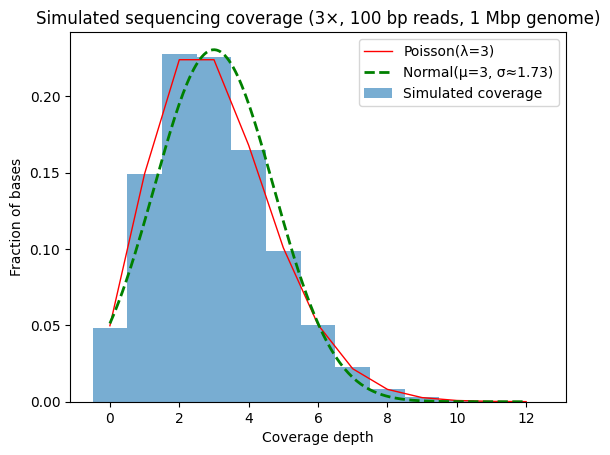

In [17]:
coverage_dist(genomesize=1_000_000, readlength=100, coverage=3, poisson_lambda=3, normal_mean=3, normal_std=1.73)

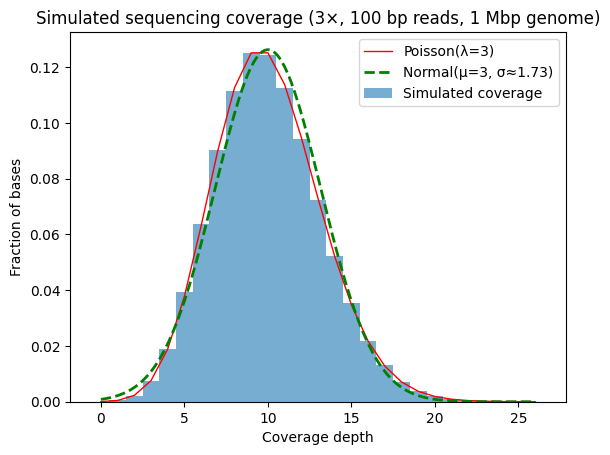

In [15]:
coverage_dist(genomesize=1_000_000, readlength=100, coverage=10, poisson_lambda=10, normal_mean=10, normal_std=3.16)

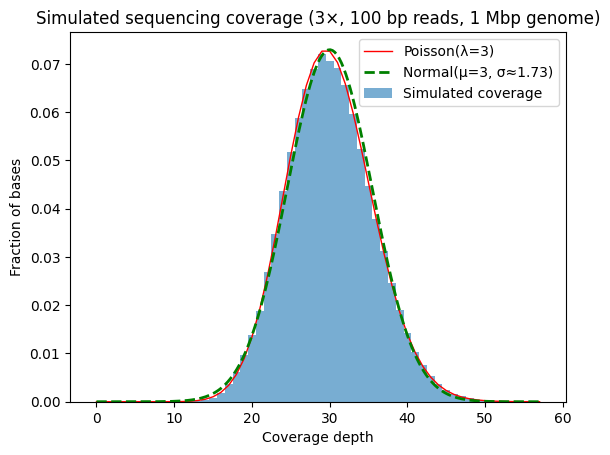

In [16]:
coverage_dist(genomesize=1_000_000, readlength=100, coverage=30, poisson_lambda=30, normal_mean=30, normal_std=5.47)